In [25]:
"""
This notebook is used to play with the dataset, displaying images and understand the structure of the dataset. 
Note: we can use this to check if duplicate images also have duplicate captions.
"""
%load_ext autoreload
%autoreload 2
import pandas as pd
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# specify dataset and paths to work on
DATASET_ENTITY_COUNT = 20000
DATASET_BASE_PATH = f"/Users/yavuz/data/LAION-{DATASET_ENTITY_COUNT}/"

METADATA_PATH = DATASET_BASE_PATH + "metadata.parquet"
IMAGES_PATH = DATASET_BASE_PATH + "images/"

vector_path = DATASET_BASE_PATH + "vectors/"

assert os.path.exists(METADATA_PATH)
assert os.path.exists(IMAGES_PATH)
assert os.path.exists(vector_path)

In [8]:
df=pd.read_parquet(METADATA_PATH)
df

,index,SAMPLE_ID,URL,TEXT,HEIGHT,WIDTH,LICENSE,NSFW,similarity
0,1,1.060015e+12,https://thumbs.ebaystatic.com/images/g/DYEAAOS...,Silverline Air Framing Nailer 90mm 10 - 12 Gau...,225.0,225.0,?,UNLIKELY,0.312485
1,2,3.372497e+12,https://farm1.staticflickr.com/784/40182677504...,Anhui Mountains,800.0,514.0,?,UNLIKELY,0.316512
2,3,3.820200e+11,https://t2.ftcdn.net/jpg/00/58/35/35/240_F_583...,Acute pain in a woman knee,257.0,240.0,?,UNLIKELY,0.344278
3,5,2.179119e+12,https://i.pinimg.com/236x/03/38/05/0338055833e...,Essentials Barnwood 70-inch TV Media Stand,236.0,236.0,?,UNLIKELY,0.332799
4,7,1.727450e+11,http://cdn.pastemagazine.com/www/articles/2011...,Ben Affleck Could Be Latest Addition To <em>Th...,320.0,320.0,?,UNLIKELY,0.353303
...,...,...,...,...,...,...,...,...,...
12783,19994,4.063788e+12,https://publicauthordotcom.files.wordpress.com...,Letters over the Wall cover,205.0,300.0,?,UNLIKELY,0.303382
12784,19995,1.530866e+12,https://www.digsdigs.com/photos/sweet-shabby-c...,Http Www Digsdigs Com 33 Sweet Shabby Chic Bed...,480.0,486.0,?,UNLIKELY,0.352294
12785,19997,4.247173e+12,https://goalstudio.com/web/product/medium/2020...,TOTTENHAM 940 BALL CAP - GOLD,1100.0,1460.0,?,UNLIKELY,0.388634
12786,19998,1.505120e+11,https://thumbs.dreamstime.com/m/clown-toy-colo...,Clown toy color vector illustration Royalty Fr...,92.0,130.0,?,UNLIKELY,0.349995


In [22]:
id = 15
df.iloc[id]

index                                                        24
SAMPLE_ID                                       1267734014100.0
URL           https://cdn3.mecum.com/auctions/ha0413/ha0413-...
TEXT                          1990 Chevrolet Corvette ZR1 Image
HEIGHT                                                    416.0
WIDTH                                                     234.0
LICENSE                                                       ?
NSFW                                                   UNLIKELY
similarity                                             0.311244
Name: 15, dtype: object

In [23]:
id, df["TEXT"][id], df["URL"][id], df["index"][id]

(15,
 '1990 Chevrolet Corvette ZR1 Image',
 'https://cdn3.mecum.com/auctions/ha0413/ha0413-154735/consign/ha0413-154735_consign.jpg?1363216046000',
 24)

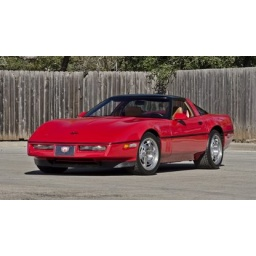

In [24]:
from IPython.display import display, Image
def get_image(vector_id: int, images_path: str):
    """
    Given a vector id and base images path (IMAGES_PATH), returns the image.
    """
    shard = str(vector_id // 10000).zfill(5)
    index = str(vector_id % 10000).zfill(4)
    image_path = f"{images_path}/{shard}/{shard}{index}.jpg"
    return Image(filename=image_path) 
display(get_image(id, IMAGES_PATH))